In [1]:
import pandas as pd   # Import the pandas library as 'pd' for data manipulation and analysis
import numpy as np  # Import the numpy library as 'np' for numerical operations
import xgboost # Import the XGBoost library, a popular machine learning algorithm

# Import the 'model_selection' module from scikit-learn for splitting the dataset into training and testing sets
from sklearn import model_selection

# Import the 'accuracy_score' metric from scikit-learn to evaluate model accuracy
from sklearn.metrics import accuracy_score

# Import the 'LabelEncoder' from scikit-learn for encoding categorical labels as numerical values
from sklearn.preprocessing import LabelEncoder

# Enable inline plotting of Matplotlib figures in Notebook
%matplotlib inline

# Import the Matplotlib library for creating visualizations
import matplotlib.pyplot as plt

# Import the Seaborn library for data visualization and styling
import seaborn as sns

# Import the StandardScaler class from scikit-learn for feature scaling
from sklearn.preprocessing import StandardScaler

# Import the RandomForestClassifier class for building a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Import the train_test_split function for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the RandomizedSearchCV class for hyperparameter tuning using random search
from sklearn.model_selection import RandomizedSearchCV

# Import the KFold class for cross-validation
from sklearn.model_selection import KFold

# Import performance metrics such as accuracy_score, recall_score, and confusion_matrix for model evaluation
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix



In [2]:
# Load a CSV file from the specified path into a pandas DataFrame, specifying that the first row contains data (header=None)
data = pd.read_csv('/content/drive/MyDrive/telecom churn project/churn_geekl.csv', header=None)

In [3]:
# Convert the pandas DataFrame to a NumPy array by accessing its values
dataset = data.values

# Display the first few rows of the loaded dataset to inspect its contents
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,KS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,...,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.
2,OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,...,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
3,NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,...,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.
4,OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.


In [4]:
# Check for missing (null) values in the 'data' DataFrame by using the `.isnull()` method,
# followed by `.any()` to check if any missing values exist for each column,
# and then another `.any()` to check if there are any missing values in the entire DataFrame.
data.isnull().any().any()

False

<Axes: >

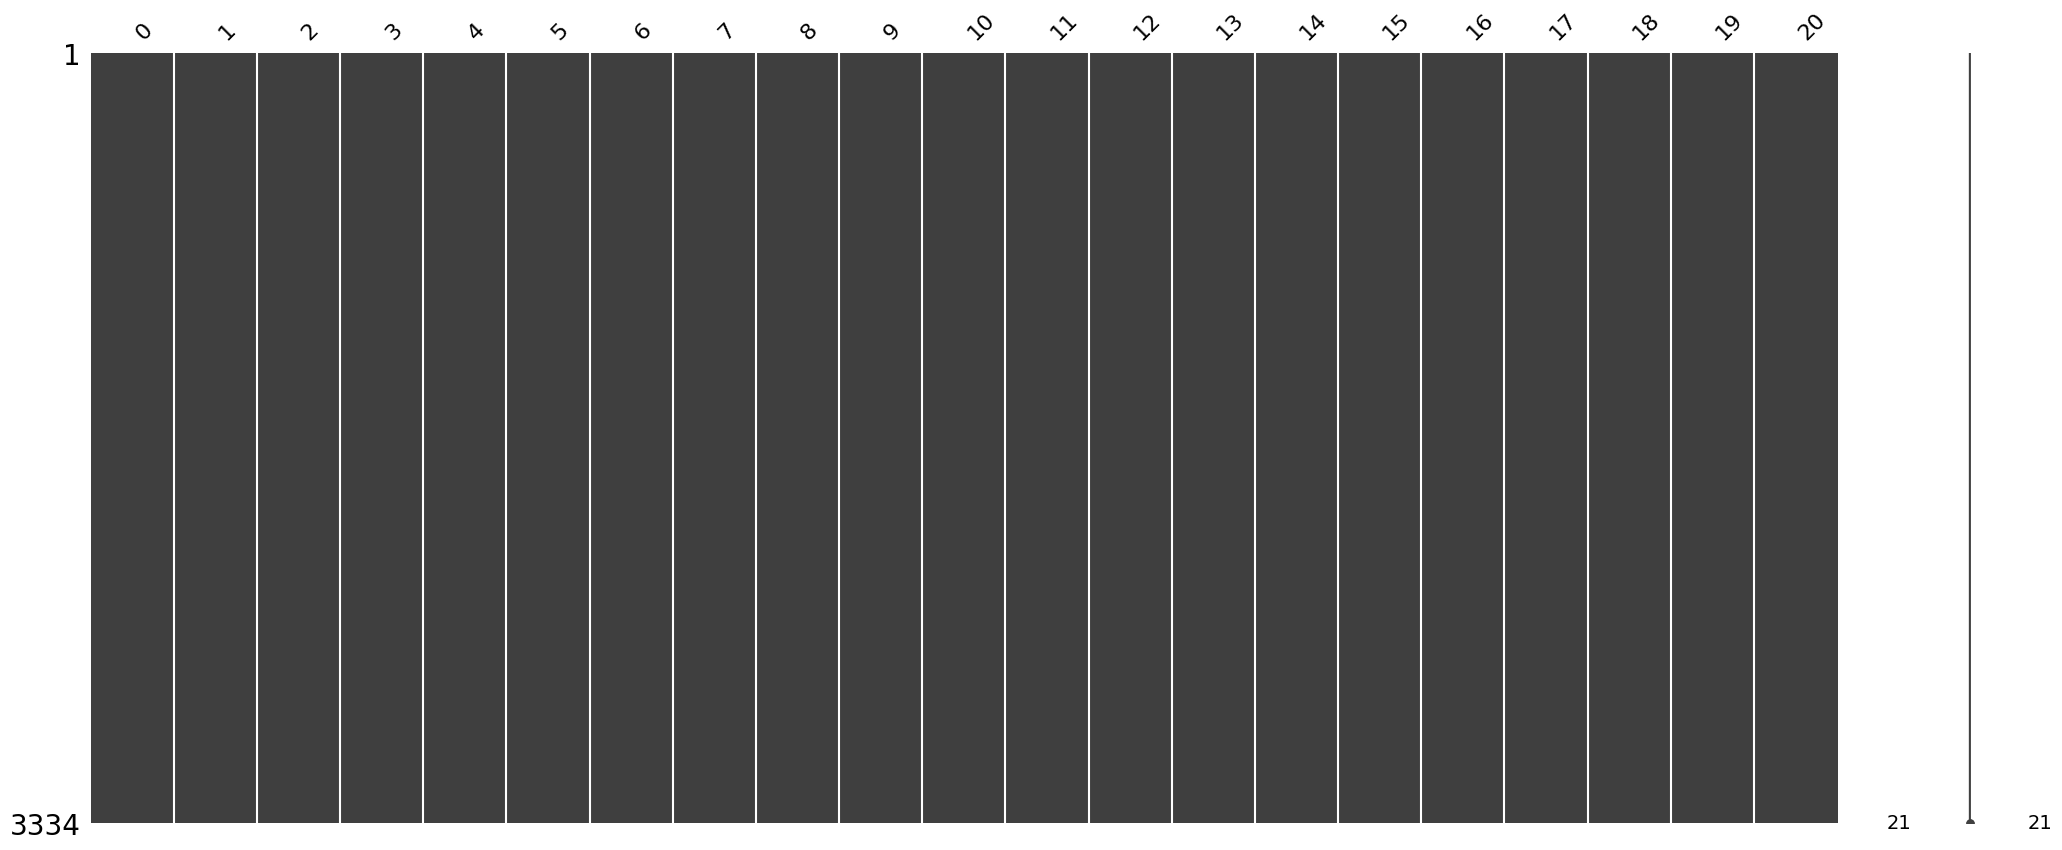

In [5]:
# Import the 'missingno' library as 'msno' for visualizing missing data
import missingno as msno

# Create a matrix visualization of missing data in the 'data' DataFrame using 'msno.matrix()'
msno.matrix(data)

In [6]:
# Set the column names of the 'data' DataFrame to the values in the first row (index 0)
data.columns = data.iloc[0]

# Drop the first row (index 0) from the 'data' DataFrame to make it the header row
data = data.drop(data.index[0])

In [7]:
# Get the list of column names from the 'data' DataFrame using the 'columns' attribute
col_names = data.columns.tolist()

In [8]:
# 'col_names' now contains the names of the columns as a list
col_names

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [9]:
# Rename specific columns in the 'data' DataFrame using a dictionary for column name mapping
data.rename(columns={ 'Account Length':'Account_Length',
                     'Area Code':'Area_Code',
                     "Int'l Plan":'Intl_Plan',
                      'VMail Plan':'VMail_Plan',
                       'VMail Message':'VMail_Message',
                       'Day Mins':'Day_Mins',
                       'Day Calls':'Day_Calls',
                       'Day Charge':'Day_Charge',
                       'Eve Mins':'Eve_Mins',
                      'Eve Calls': 'Eve_Calls',
                      'Eve Charge':'Eve_Charge',
                      'Night Mins':'Night_Mins',
                      'Night Calls':'Night_Calls',
                     'Night Charge':'Night_Charge',
                     'Intl Mins':'Intl_Mins',
                      'Intl Calls':'Intl_Calls',
                     'Intl Charge':'Intl_Charge',
                     'CustServ Calls':'CustServ_Calls',
                     'Churn?':'Churn'},inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 1 to 3333
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           3333 non-null   object
 1   Account_Length  3333 non-null   object
 2   Area_Code       3333 non-null   object
 3   Phone           3333 non-null   object
 4   Intl_Plan       3333 non-null   object
 5   VMail_Plan      3333 non-null   object
 6   VMail_Message   3333 non-null   object
 7   Day_Mins        3333 non-null   object
 8   Day_Calls       3333 non-null   object
 9   Day_Charge      3333 non-null   object
 10  Eve_Mins        3333 non-null   object
 11  Eve_Calls       3333 non-null   object
 12  Eve_Charge      3333 non-null   object
 13  Night_Mins      3333 non-null   object
 14  Night_Calls     3333 non-null   object
 15  Night_Charge    3333 non-null   object
 16  Intl_Mins       3333 non-null   object
 17  Intl_Calls      3333 non-null   object
 18  Intl_Cha

In [11]:
# Filter churned customers (Churn == "True.")
churned_customers = data[data['Churn'] == "True."]

# Filter non-churned customers (Churn == "False.")
non_churned_customers = data[data['Churn'] == "False."]

# Display churned customer count
print("Churned Customer Count:", len(churned_customers))

# Display non-churned customer count
print("Non-Churned Customer Count:", len(non_churned_customers))


Churned Customer Count: 483
Non-Churned Customer Count: 2850


In [12]:
# Convert the 'Day_Charge', 'Eve_Charge', and 'Night_Charge' columns in the 'data' DataFrame to numeric data types.
# The 'errors' parameter is set to 'coerce' to handle and replace any non-numeric values with NaN (Not-a-Number).

data['Day_Charge'] = pd.to_numeric(data['Day_Charge'], errors='coerce')
data['Eve_Charge'] = pd.to_numeric(data['Eve_Charge'], errors='coerce')
data['Night_Charge'] = pd.to_numeric(data['Night_Charge'], errors='coerce')

In [13]:
# Convert 'Day_Calls' to numeric
data['Day_Calls'] = pd.to_numeric(data['Day_Calls'], errors='coerce')

# Convert 'Eve_Calls' to numeric
data['Eve_Calls'] = pd.to_numeric(data['Eve_Calls'], errors='coerce')

# Convert 'Night_Calls' to numeric
data['Night_Calls'] = pd.to_numeric(data['Night_Calls'], errors='coerce')


In [14]:
# Now, you can calculate the new features
data['Total_Calls'] = data['Day_Calls'] + data['Eve_Calls'] + data['Night_Calls']
data['Total_Charges'] = data['Day_Charge'] + data['Eve_Charge'] + data['Night_Charge']

In [15]:
data['Day_Mins'] = pd.to_numeric(data['Day_Mins'], errors='coerce')
data['Total_Calls'] = pd.to_numeric(data['Total_Calls'], errors='coerce')

In [16]:
# Calculate a new column 'Avg_Call_Duration' by dividing 'Day_Mins' by 'Total_Calls' in the 'data' DataFrame
data['Avg_Call_Duration'] = data['Day_Mins'] / data['Total_Calls']

In [17]:
data['Intl_Mins'] = pd.to_numeric(data['Intl_Mins'], errors='coerce')
data['Intl_Calls'] = pd.to_numeric(data['Intl_Calls'], errors='coerce')

In [18]:
data['Avg_Intl_Call_Duration'] = data['Intl_Mins'] / data['Intl_Calls']

In [19]:
# Calculate total international calls and average international call duration
data['Total_International_Calls'] = data['Intl_Calls']

In [20]:
# Display the first few rows of the 'data' DataFrame to inspect the dataset's structure and contents
data.head()

,State,Account_Length,Area_Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn,Total_Calls,Total_Charges,Avg_Call_Duration,Avg_Intl_Call_Duration,Total_International_Calls
1,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,10.0,3,2.700000,1,False.,300,72.86,0.883667,3.333333,3
2,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,13.7,3,3.700000,1,False.,329,55.54,0.491185,4.566667,3
3,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,12.2,5,3.290000,0,False.,328,59.00,0.742073,2.440000,5
4,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,6.6,7,1.780000,2,False.,248,65.02,1.207258,0.942857,7
5,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,10.1,3,2.730000,3,False.,356,49.36,0.468258,3.366667,3


In [21]:
# Create a new DataFrame 'df' using the existing 'data' DataFrame
df = pd.DataFrame(data)

In [22]:
# Specify the file path where you want to save the CSV file
output_csv_file = "output_dataset.csv"

In [23]:
# Export the DataFrame to the CSV file
df.to_csv(output_csv_file, index=False)

In [24]:
# Display the counts of unique values in the 'Intl_Plan', 'VMail_Plan', and 'Churn' columns of the 'data' DataFrame

# Counts of unique values in the 'Intl_Plan' column
print('\n', data.Intl_Plan.value_counts())

# Counts of unique values in the 'VMail_Plan' column
print('\n', data.VMail_Plan.value_counts())

# Counts of unique values in the 'Churn' column
print('\n', data.Churn.value_counts())


 no     3010
yes     323
Name: Intl_Plan, dtype: int64

 no     2411
yes     922
Name: VMail_Plan, dtype: int64

 False.    2850
True.      483
Name: Churn, dtype: int64


In [25]:
# Convert specific columns ('Intl_Plan', 'VMail_Plan', and 'Churn') from binary text values to binary numeric values (0 or 1)
data.Intl_Plan = data.Intl_Plan.apply( lambda x: 1.0 * (x=='yes') )
print('\n', data.Intl_Plan.value_counts())

data.VMail_Plan = data.VMail_Plan.apply( lambda x: 1.0 * (x=='yes') )
print('\n', data.VMail_Plan.value_counts())

data.Churn = data.Churn.apply( lambda x: 1.0 * (x=='True.') )
print('\n', data.Churn.value_counts())


 0.0    3010
1.0     323
Name: Intl_Plan, dtype: int64

 0.0    2411
1.0     922
Name: VMail_Plan, dtype: int64

 0.0    2850
1.0     483
Name: Churn, dtype: int64


In [26]:
# Generate a statistical summary of the numerical columns in the 'data' DataFrame
data.describe()

,Intl_Plan,VMail_Plan,Day_Mins,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Churn,Total_Calls,Total_Charges,Avg_Call_Duration,Avg_Intl_Call_Duration,Total_International_Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3315.000000,3333.000000
mean,0.096910,0.276628,179.775098,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,10.237294,4.479448,0.144914,300.657666,56.685173,0.605545,3.112385,4.479448
std,0.295879,0.447398,54.467389,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.791840,2.461214,0.352067,34.328232,10.487816,0.196985,2.260809,2.461214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,0.000000,188.000000,19.980000,0.000000,0.216667,0.000000
25%,0.000000,0.000000,143.700000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,8.500000,3.000000,0.000000,278.000000,49.590000,0.469688,1.685714,3.000000
50%,0.000000,0.000000,179.400000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,10.300000,4.000000,0.000000,301.000000,56.630000,0.596141,2.460000,4.000000
75%,0.000000,1.000000,216.400000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,12.100000,6.000000,0.000000,324.000000,63.650000,0.732895,3.800000,6.000000
max,1.000000,1.000000,350.800000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,20.000000,1.000000,410.000000,92.560000,1.561058,18.200000,20.000000


In [27]:
# Set the default style and context for Seaborn plots and figures
sns.set()

In [28]:
# Create a pivot table using Pandas to analyze the 'Churn' column based on 'CustServ_Calls' values

# Create a pivot table 'df2' with values from the 'Churn' column, indexed by 'CustServ_Calls'
# Calculate the length of each group, the sum of 'Churn' values, and the mean of 'Churn' values in each group
df2 = pd.pivot_table(data, values='Churn', index=['CustServ_Calls'], aggfunc=[len, np.sum, np.mean])

# Add a new column 'ix' to 'df2' containing the index values
df2['ix'] = df2.index.values

# Drop the top-level column names to have a cleaner DataFrame
df2.columns = df2.columns.droplevel()

print(df2)


                 len    sum      mean ix
CustServ_Calls                          
0                697   92.0  0.131994  0
1               1181  122.0  0.103302  1
2                759   87.0  0.114625  2
3                429   44.0  0.102564  3
4                166   76.0  0.457831  4
5                 66   40.0  0.606061  5
6                 22   14.0  0.636364  6
7                  9    5.0  0.555556  7
8                  2    1.0  0.500000  8
9                  2    2.0  1.000000  9


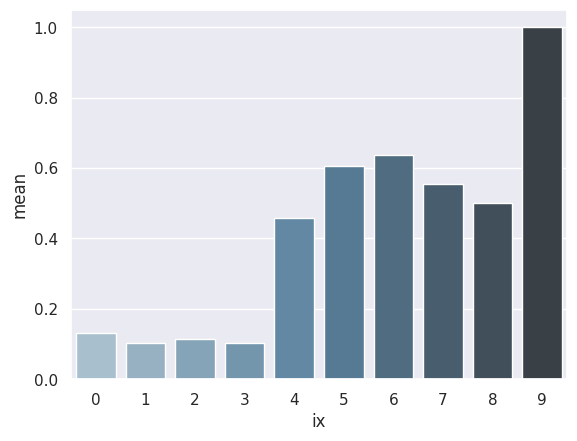

In [29]:
# Use Seaborn's barplot to display the 'ix' column (x-axis) against the 'mean' column (y-axis) from the 'df2' DataFrame
# Customize the color palette to "Blues_d" and adjust saturation for aesthetics
sns.barplot(x="ix", y="mean", data=df2, palette="Blues_d", saturation=0.5)

plt.show()

In [30]:
# columns to drop from 'data'
to_drop = ['State', 'Area_Code', 'Phone', 'Churn']
# Create a new DataFrame 'churn_feat_space' by removing the specified columns using the 'drop' method
# The 'axis=1' argument indicates that columns are being dropped
churn_feat_space = data.drop(to_drop, axis=1)

In [31]:
# Pull out features for future use

# Get the column names (features) from the 'churn_feat_space' DataFrame
features = churn_feat_space.columns

# Create a feature matrix 'X' by converting the values in 'churn_feat_space' to float data type
X = churn_feat_space.values.astype(np.float)

# Extract the target variable 'Churn' from the original 'data' DataFrame
churn_result = data['Churn']

# Count and display the distribution of the 'Churn' values (target variable)
data['Churn'].value_counts()

<ipython-input-31-7f36e7b44118>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = churn_feat_space.values.astype(np.float)


0.0    2850
1.0     483
Name: Churn, dtype: int64

In [32]:
print(churn_feat_space.columns)

Index(['Account_Length', 'Intl_Plan', 'VMail_Plan', 'VMail_Message',
       'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls',
       'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge', 'Intl_Mins',
       'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Total_Calls',
       'Total_Charges', 'Avg_Call_Duration', 'Avg_Intl_Call_Duration',
       'Total_International_Calls'],
      dtype='object', name=0)


In [33]:
y = np.where(churn_result == 1,1,0)


scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Feature space holds %d observations and %d features" % X.shape)
print("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 22 features
Unique target labels: [0 1]


In [34]:
def run_cv(X, y, clf_class, **kwargs):
    y_pred = y.copy()
    kf = KFold(n_splits=5, shuffle=True)

    # Iterate through folds
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]

        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred,clf

In [35]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with a strategy (e.g., mean, median, or most frequent)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
X_imputed = imputer.fit_transform(X)

# Now, you can train your RandomForestClassifier on the imputed data
rf, RF = run_cv(X_imputed, y, RandomForestClassifier)


In [36]:
def accuracy(y_true, y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

In [37]:
print("Random forest: {}%".format(100.0*accuracy(y, rf)))

Random forest: 97.02970297029702%


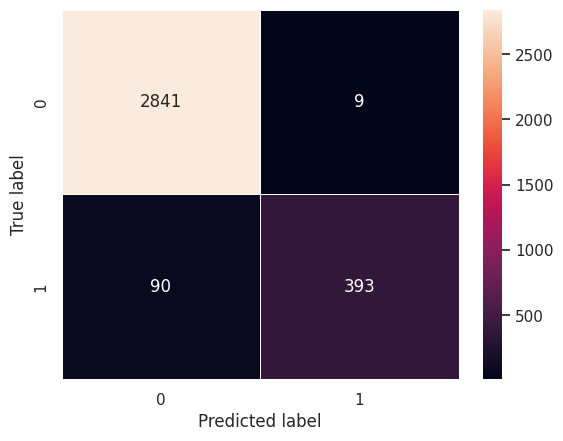

In [38]:
sns.heatmap(confusion_matrix(y,rf,labels=[0,1]), annot=True, fmt="d", linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
pass

In [39]:
RF.predict_proba(X[0:10])

array([[0.94, 0.06],
       [0.91, 0.09],
       [1.  , 0.  ],
       [0.72, 0.28],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.94, 0.06],
       [0.97, 0.03],
       [0.91, 0.09],
       [0.89, 0.11]])

In [40]:
pip install xgboost

In [41]:
import xgboost as xgb
from xgboost import XGBClassifier

In [42]:

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [43]:
xgbmodel=xgb.XGBClassifier()
xgbmodel

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
xgbmodel=xgbmodel.fit(X_train,y_train)

In [45]:
print("Training set accuracy :",xgbmodel.score(X_train,y_train)*100)
print("testing set accuracy :",xgbmodel.score(X_test,y_test)*100)

Training set accuracy : 100.0
testing set accuracy : 97.0


In [46]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [5, 10, 15, 20],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0.001, 0.01, 0.1, 1, 10],
    'reg_lambda': [0.001, 0.01, 0.1, 1, 10],
    'scale_pos_weight': [1, 1.5, 2, 2.5]
}

In [47]:
xgb_model = XGBClassifier(random_state=42)

In [48]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=100,
    scoring='accuracy', n_jobs=-1, cv=5, random_state=42
)

In [49]:
# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1000],
                                        'reg_alpha': [0.001, 0.01, 0.1, 1, 10],
                                        'reg_lambda': [0.001, 0.01, 0.1, 1, 10],
                                        'scale_pos_weight': [1, 1.5, 2, 2.5],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [50]:
# Get the best parameters and best accuracy
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

In [51]:
print("Best Parameters:", best_params)
print("Best Accuracy: {:.2f}%".format(best_accuracy * 100))

Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 2.5, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Accuracy: 97.18%


In [52]:
import lightgbm as lgb

In [53]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [54]:
lgbmodel = lgb.LGBMClassifier()
lgbmodel = lgbmodel.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 320, number of negative: 1913
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3321
[LightGBM] [Info] Number of data points in the train set: 2233, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143305 -> initscore=-1.788107
[LightGBM] [Info] Start training from score -1.788107


In [55]:
print("Training set accuracy:", lgbmodel.score(X_train, y_train) * 100)
print("Testing set accuracy:", lgbmodel.score(X_test, y_test) * 100)

Training set accuracy: 100.0
Testing set accuracy: 97.0


In [56]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score

In [57]:
# Random Forest
rf_f1 = f1_score(y, rf)
rf_recall = recall_score(y, rf)
rf_precision = precision_score(y, rf)
rf_roc_auc = roc_auc_score(y, rf)

# XGBoost
xgb_f1 = f1_score(y, xgbmodel.predict(X))
xgb_recall = recall_score(y, xgbmodel.predict(X))
xgb_precision = precision_score(y, xgbmodel.predict(X))
xgb_roc_auc = roc_auc_score(y, xgbmodel.predict(X))

# LightGBM
lgb_f1 = f1_score(y, lgbmodel.predict(X))
lgb_recall = recall_score(y, lgbmodel.predict(X))
lgb_precision = precision_score(y, lgbmodel.predict(X))
lgb_roc_auc = roc_auc_score(y, lgbmodel.predict(X))


In [58]:
# Create a summary table
summary_table = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'F1-Score': [rf_f1, xgb_f1, lgb_f1],
    'Recall': [rf_recall, xgb_recall, lgb_recall],
    'Precision': [rf_precision, xgb_precision, lgb_precision],
    'ROC-AUC': [rf_roc_auc, xgb_roc_auc, lgb_roc_auc]
})

# Display the summary table
print(summary_table)

           Model  F1-Score    Recall  Precision   ROC-AUC
0  Random Forest  0.888136  0.813665   0.977612  0.905253
1        XGBoost  0.965153  0.946170   0.984914  0.971857
2       LightGBM  0.965300  0.950311   0.980769  0.973576


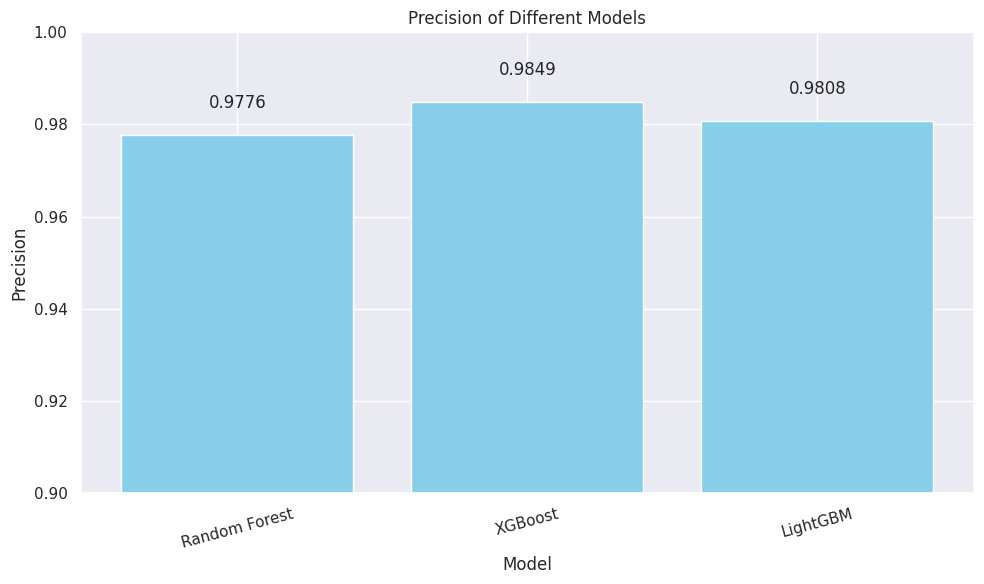

In [59]:
# Model names and corresponding precision values
models = ['Random Forest', 'XGBoost', 'LightGBM']
precisions = [rf_precision, xgb_precision, lgb_precision]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, precisions, color='skyblue')
plt.title('Precision of Different Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0.9, 1.0)  # Adjust the y-axis limits for better visualization
plt.xticks(rotation=15)  # Rotate x-axis labels for readability

# Add precision values on top of the bars
for i, precision in enumerate(precisions):
    plt.text(i, precision + 0.005, f'{precision:.4f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
